### 4. [Nieobowiązkowe] Wykres średniej długości rozgrywki L od p
Proszę zasymulować N=100 procesów ruiny gracza z łącznymi kapitałami początkowymi a = b = 50.

Proszę wyznaczyć wykres średniego trwania rozgrywki (wartość znana z poprzedniego zadania) w zależności od prawdopodobieństwa p.

### Poprawiona wersja na dole

Dane z zadania 3:

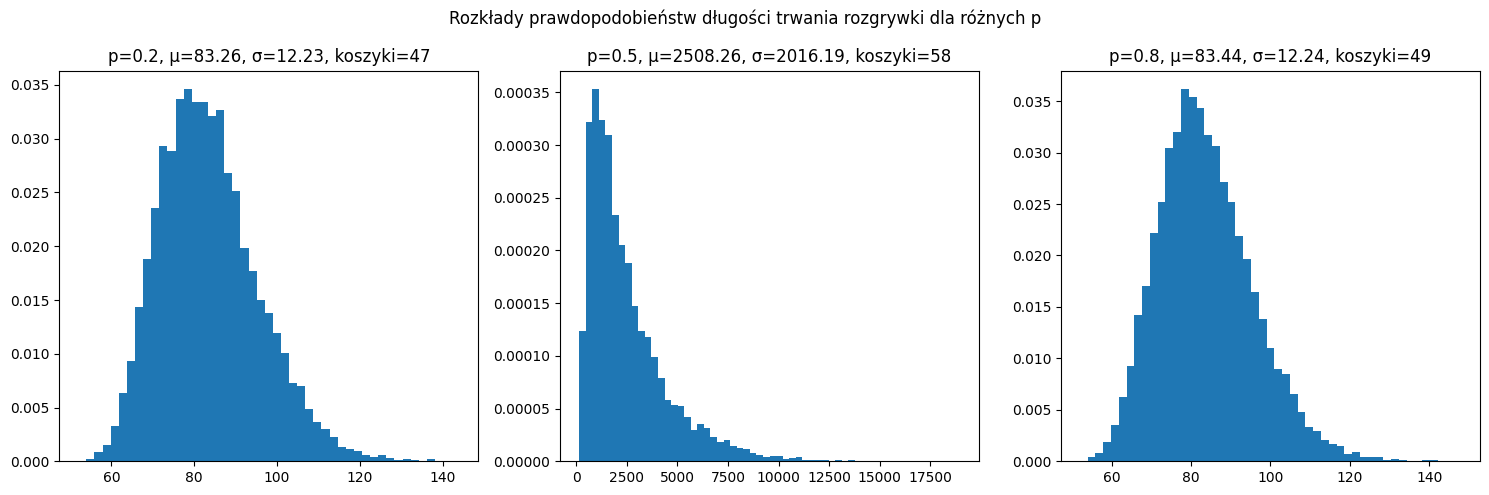

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import defaultdict

In [3]:
mean_durations = {
    "0.2": 83,
    "0.5": 2508,
    "0.8": 83
}

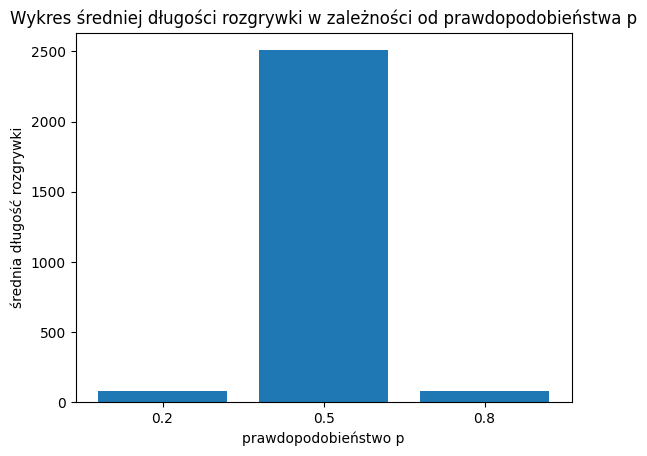

In [4]:
plt.title("Wykres średniej długości rozgrywki w zależności od prawdopodobieństwa p")
plt.xlabel("prawdopodobieństwo p")
plt.ylabel("średnia długość rozgrywki")
plt.bar(mean_durations.keys(), mean_durations.values());

### Poprawiona wersja:
Tym razem, zamiast użyć tylko trzech wartości z poprzedniego zadania, zasymulowałem 100000 procesów ruiny gracza (wykres dokładniejszy niż dla 100). Prawdopodobieństwa losowałem z przedziału [0,1] i zaokrąglałem do 2 liczb po przecinku. Jeśli wylosowane prawdopodobieństwa się powtórzyły, liczyłem średnią z wyników dla nich osiągniętych.

In [2]:
def simulate_ruin(capital_a: int, capital_b: int, p: float) -> tuple[int, int, int]:
    """
    p - probability of player A taking 1$ from player B
    """
    length = 0
    while capital_a != 0 and capital_b != 0:
        length += 1
        if np.random.rand() < p:
            capital_a += 1
            capital_b -= 1
        else:
            capital_a -= 1
            capital_b += 1

    return capital_a, capital_b, length

In [40]:
n_games = 100000
capital_a = capital_b = 50
durations = defaultdict(list)

for _ in range(n_games):  
    p = round(random.uniform(0, 1), 2)
    _, _, length = simulate_ruin(capital_a, capital_b, p)
    durations[p].append(length)

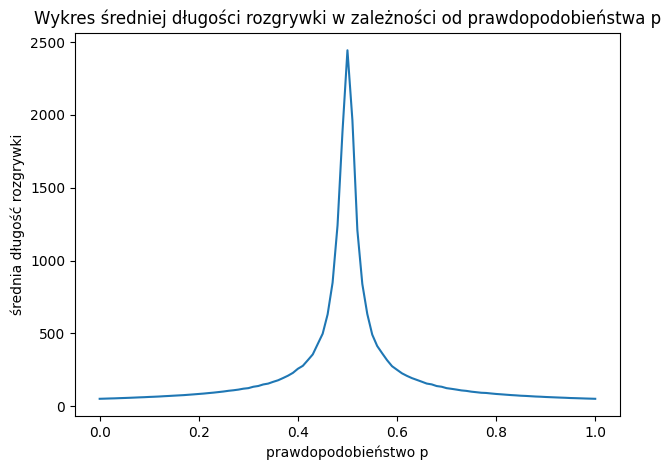

In [41]:
mean_durations = {p: np.mean(durations[p]) for p in durations}
ps = sorted(mean_durations.keys())
means = [mean_durations[p] for p in ps]

plt.title("Wykres średniej długości rozgrywki w zależności od prawdopodobieństwa p")
plt.xlabel("prawdopodobieństwo p")
plt.ylabel("średnia długość rozgrywki")
plt.plot(ps, means)
plt.tight_layout()

Dodatkowo, wyniki dla 0.0 i 1.0 (na wykresie nie widać tak dokładnie tych wartości) - wyniki się zgadzają. Jeśli jeden gracz ciągle wygrywa, a drugi przegrywa, to po 50 (tyle wynosi kapitał początkowy) grach, proces zakończy się.

In [43]:
mean_durations[0.0]

50.0

In [44]:
mean_durations[1.0]

50.0